# Analyse RFM

Tout d'abord, il s'agit de faire un premier tri parmis les features, certaines n'étant probablement pas pertinentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

raw_datas = pd.read_csv("POLIST_09_final_raw_dataset.csv")
raw_datas

,order_id,customer_unique_id,customer_state,delivering_time,delivered_before_time,nb_score,score_mean,init_score,diff_score,purchase_date,purchase_y_m,purchase_y_q,purchase_y_s,purchase_y,days_last_purchase,sequential_max,pay_sum,installments_min,installments_max,installments_mean,installments_size,type_boleto,type_credit_card,type_debit_card,type_voucher,price_min,price_mean,price_max,price_sum,freight_value_min,freight_value_mean,freight_value_max,freight_value_sum,product_description_lenght_min,product_description_lenght_mean,product_description_lenght_max,product_photos_qty_min,product_photos_qty_mean,product_photos_qty_max,weight_min,weight_mean,weight_max,nb_product_min,nb_product_mean,nb_product_max,nb_product_sum,category__agro_industry_and_commerce,category__air_conditioning,category__art,category__arts_and_craftmanship,category__audio,category__auto,category__baby,category__bed_bath_table,category__books_general_interest,category__books_imported,category__books_technical,category__cds_dvds_musicals,category__christmas_supplies,category__cine_photo,category__computers,category__computers_accessories,category__consoles_games,category__construction_tools_construction,category__construction_tools_lights,category__construction_tools_safety,category__cool_stuff,category__costruction_tools_garden,category__costruction_tools_tools,category__diapers_and_hygiene,category__drinks,category__dvds_blu_ray,category__electronics,category__fashio_female_clothing,category__fashion_bags_accessories,category__fashion_childrens_clothes,category__fashion_male_clothing,category__fashion_shoes,category__fashion_sport,category__fashion_underwear_beach,category__fixed_telephony,category__flowers,category__food,category__food_drink,category__furniture_bedroom,category__furniture_decor,category__furniture_living_room,category__furniture_mattress_and_upholstery,category__garden_tools,category__health_beauty,category__home_appliances,category__home_appliances_2,category__home_comfort_2,category__home_confort,category__home_construction,category__housewares,category__industry_commerce_and_business,category__kitchen_dining_laundry_garden_furniture,category__kitchen_laptops_and_food_preparers,category__la_cuisine,category__luggage_accessories,category__market_place,category__music,category__musical_instruments,category__office_furniture,category__others,category__party_supplies,category__pc_gamer,category__perfumery,category__pet_shop,category__security_and_services,category__signaling_and_security,category__small_appliances,category__small_appliances_home_oven_and_coffee,category__sports_leisure,category__stationery,category__tablets_printing_image,category__telephony,category__toys,category__watches_gifts,seller_state__AC,seller_state__AM,seller_state__BA,seller_state__CE,seller_state__DF,seller_state__ES,seller_state__GO,seller_state__MA,seller_state__MG,seller_state__MS,seller_state__MT,seller_state__PA,seller_state__PB,seller_state__PE,seller_state__PI,seller_state__PR,seller_state__RJ,seller_state__RN,seller_state__RO,seller_state__RS,seller_state__SC,seller_state__SE,seller_state__SP
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,8.0,True,1,4.0,4,0,2017-10-02,201710,20174,20172,2017,331,3,38.71,1,1,1.0,3,0.0,1.0,0.0,2.0,29.99,29.99,29.99,29.99,8.72,8.72,8.72,8.72,268.0,268.0,268.0,4.0,4.0,4.0,1.0,1.0,1.0,1,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA,12.0,True,1,4.0,4,0,2018-07-24,201807,20183,20182,2018,36,1,141.46,1,1,1.0,1,1.0,0.0,0.0,0.0,118.70,118.70,118.70,118.70,22.76,22.76,22.76,22.76,178.0,178.0,

## Tri des features

Je peux exclure "product_photos_qty_min", "product_photos_qty_max", "product_description_lenght_min", "product_description_lenght_max", "sequential_max".

Vérifier les valeurs de "delivered_before_time" avant de décider quoi faire.

"customer_state" est censé être unique pour chaque client. Néanmoins, y-t-il eu des déménagements? Donc plusieurs valeurs pour un même client?


In [2]:
raw_datas.drop(["product_photos_qty_min", "product_photos_qty_max", "product_description_lenght_min", 
    "product_description_lenght_max", "sequential_max"], axis=1, inplace=True)

In [3]:
raw_datas.groupby(["delivered_before_time"]).size().reset_index()

,delivered_before_time,0
0,False,7804
1,True,88104


Y-t-il une corrélation entre la note du client et le fait que le colis ait été livré à temps?

<AxesSubplot:>

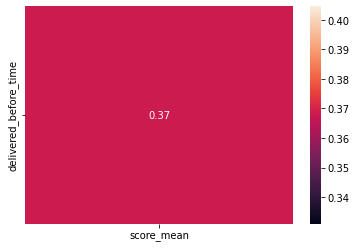

In [4]:
import seaborn as sns

sns.heatmap(raw_datas[["delivered_before_time", "score_mean"]].corr().filter(["score_mean"]).drop(["score_mean"]), annot=True)

In [5]:
def point_size(datas):
    bool_dict = {}
    bool_dict["True"] = {}
    bool_dict["False"] = {}
    bool_dict["Both"] = {}

    for i in range(len(datas)):
        score_val = datas.loc[i, "score_mean"]
        bool_val = datas.loc[i, "delivered_before_time"]
        if bool_val:
            if bool_dict["True"].get(score_val) is not None:
                bool_dict["True"][score_val] += 1
            else:
                bool_dict["True"][score_val] = 1
        else:
            if bool_dict["False"].get(score_val) is not None:
                bool_dict["False"][score_val] += 1
            else:
                bool_dict["False"][score_val] = 1
        if bool_dict["Both"].get(score_val) is not None:
            bool_dict["Both"][score_val] += 1
        else:
            bool_dict["Both"][score_val] = 1

    return bool_dict


In [6]:
points = point_size(raw_datas)

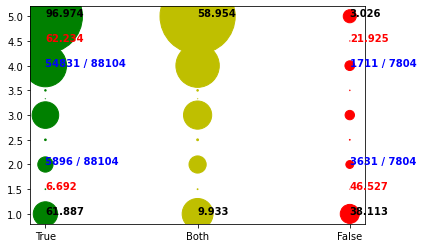

In [7]:
plt.scatter(["True" for x in range(len(points["True"]))], [x for x in points["True"].keys()], s= [x/10 for x in points["True"].values()], c= "g")
plt.scatter(["Both" for x in range(len(points["Both"]))], [x for x in points["Both"].keys()], s= [x/10 for x in points["Both"].values()], c= "y")
plt.scatter(["False" for x in range(len(points["False"]))], [x for x in points["False"].keys()], s= [x/10 for x in points["False"].values()], c= "r")

for i in [1, 5]:
    for j in ["True", "Both", "False"]:
        if j == "Both":
            plt.text(j, i, str(np.round(points["Both"][i] / len(raw_datas) *100, 3)), fontweight= "bold")
        else:
            plt.text(j, i, str(np.round(points[j][i] / points["Both"][i] *100, 3)), fontweight= "bold")

for i, k in zip([1, 5], [1.5, 4.5]):
    for j in ["True", "False"]:
        plt.text(j, k, str(np.round(points[j][i] / sum(points[j].values()) *100, 3)), fontweight= "bold", color= "r")

for i, k in zip([1, 5], [2, 4]):
    for j in ["True", "False"]:
        plt.text(j, k, str(points[j][i]) + " / " + str(sum(points[j].values())), fontweight= "bold", color= "b")

plt.show()

On peut voir une corrélation évaluée à 0.37 entre "delivered_before_time" (commandes livrées avant le délai imparti) et "score_mean" (moyenne des scores pour une commande).

De plus, on peut voir que sur la totalité des commandes (ronds jaunes), la plupart des commandes (88104) ont été livrées à temps (ronds verts). Les commandes ayant du retard (7804) étant en rouge. Toute proportion gardée, on constate que pour les commandes livrées à temps, il y a ~62.2% de scores notés 5/5 contre ~6.7% des notes à 1/5. À contrario, pour les commandes pas livrées dans les temps, il y a seulement ~22% de scores à 5/5 contre ~46.5% de notes à 1/5.

Cela semble confirmer la corrélation et aussi que le délai de livraison joue sur le score donné par le client.

In [8]:
cust_by_state = len(raw_datas.groupby(['customer_unique_id', 'customer_state']).size().reset_index())
cust_unique = raw_datas['customer_unique_id'].nunique()

print(f"Il y a eu {cust_by_state - cust_unique} déménagements")

Il y a eu 36 déménagements


In [9]:
# raw_datas.to_csv("POLIST_11_raw_datas.csv", index=False)

In [10]:
raw_datas = pd.read_csv("POLIST_11_raw_datas.csv")

## RFM 
### Recency (R)
Nombre de jours depuis le dernier achat

Cette valeur se trouve dans la feature "days_last_purchase" pour chaque commande. Un groupby sur "customer_unique_id" permettra de garder la toute dernière commande.


In [11]:
recency_datas = raw_datas.groupby("customer_unique_id", as_index=False)["days_last_purchase"].min()
recency_datas.rename({"days_last_purchase": "recency"}, axis=1, inplace=True)
recency_datas

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,537
3,0000f6ccb0745a6a4b88665a16c9f078,321
4,0004aac84e0df4da2b147fca70cf8255,288
...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447
92827,fffea47cd6d3cc0a88bd621562a9d061,262
92828,ffff371b4d645b6ecea244b27531430a,568
92829,ffff5962728ec6157033ef9805bacc48,119


### Frequency (F)
Nombre total d'achats

Il faut compter le nombre de commandes pour chaque client.


In [12]:
freq_datas = raw_datas.groupby("customer_unique_id", as_index= False)["order_id"].count()
freq_datas.rename({"order_id": "frequency"}, axis= 1, inplace= True)
freq_datas


,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,1
92827,fffea47cd6d3cc0a88bd621562a9d061,1
92828,ffff371b4d645b6ecea244b27531430a,1
92829,ffff5962728ec6157033ef9805bacc48,1


### Monetary Value (M)
Montant total dépensé par le client


In [13]:
monetary_datas = raw_datas.groupby("customer_unique_id", as_index= False)["pay_sum"].sum()
monetary_datas.rename({"pay_sum": "monetary"}, axis= 1, inplace= True)
monetary_datas

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
92827,fffea47cd6d3cc0a88bd621562a9d061,84.58
92828,ffff371b4d645b6ecea244b27531430a,112.46
92829,ffff5962728ec6157033ef9805bacc48,133.69


Je vais maintenant regrouper les trois jeux créés.

In [14]:
rfm_datas = recency_datas.merge(freq_datas.merge(monetary_datas, on= "customer_unique_id"), on= "customer_unique_id")
rfm_datas

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42
92827,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
92828,ffff371b4d645b6ecea244b27531430a,568,1,112.46
92829,ffff5962728ec6157033ef9805bacc48,119,1,133.69


### Segmentation des clients avec le modèle RFM

Je vais créer les segments des clients en utilisant les quintiles. Ainsi je pourrai attribuer une note allant de 1 à 5 aux variables "recency", "frequency" et "monetary". 5 étant la meilleur note et 1 la pire.

In [15]:
quintiles = rfm_datas.quantile([0.2, 0.4, 0.6, 0.8])
quintiles = quintiles.to_dict()
quintiles


{'recency': {0.2: 92.0, 0.4: 176.0, 0.6: 268.0, 0.8: 382.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 55.22, 0.4: 87.22, 0.6: 132.24, 0.8: 207.7}}

***Attention!*** Pour l'attribution du score, il faut prendre en compte que plus "recency" est petit mieux c'est.

In [16]:
def rec_score(x, col, quintiles):
    if x <= quintiles[col][0.2]:
        return 5
    elif x <= quintiles[col][0.4]:
        return 4
    elif x <= quintiles[col][0.6]:
        return 3
    elif x <= quintiles[col][0.8]:
        return 2
    else:
        return 1

def freq_mon_score(x, col, quintiles):
    if x <= quintiles[col][0.2]:
        return 1
    elif x <= quintiles[col][0.4]:
        return 2
    elif x <= quintiles[col][0.6]:
        return 3
    elif x <= quintiles[col][0.8]:
        return 4
    else:
        return 5


In [17]:
rfm_datas["r_quintiles"] = rfm_datas["recency"].apply(rec_score, args=("recency", quintiles))
rfm_datas["f_quintiles"] = rfm_datas["frequency"].apply(freq_mon_score, args=("frequency", quintiles))
rfm_datas["m_quintiles"] = rfm_datas["monetary"].apply(freq_mon_score, args=("monetary", quintiles))


In [18]:
rfm_datas

,customer_unique_id,recency,frequency,monetary,r_quintiles,f_quintiles,m_quintiles
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4
...,...,...,...,...,...,...,...
92826,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,1,1,5
92827,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,1,2
92828,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,1,3
92829,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4,1,4


In [19]:
rfm_datas["rfm_score"] = rfm_datas["r_quintiles"].map(str) + rfm_datas["f_quintiles"].map(str) + \
    rfm_datas["m_quintiles"].map(str)

In [20]:
rfm_datas[rfm_datas["rfm_score"] == "555"].sort_values(by="monetary", ascending= False)

,customer_unique_id,recency,frequency,monetary,r_quintiles,f_quintiles,m_quintiles,rfm_score
72728,c8460e4251689ba205045f3ea17884a1,21,3,3607.92,5,5,5,555
1204,0341bbd5c969923a0f801b9e2d10a7b8,91,2,1999.68,5,5,5,555
29906,525cda9909aa001ebed396f6e55eae01,22,2,1782.90,5,5,5,555
28947,4facc2e6fbc2bffab2fea92d2b4aa7e4,16,4,1760.75,5,5,5,555
20889,397b44d5bb99eabf54ea9c2b41ebb905,73,4,1756.53,5,5,5,555
...,...,...,...,...,...,...,...,...
5450,0ef7b906320b21fe4d39f99496aaa2d8,25,2,210.22,5,5,5,555
83755,e6ae3727da5a849a77c47c7d661bd152,75,2,209.97,5,5,5,555
84319,e836a4279bd9127752d8949d46f7a5a5,48,2,209.89,5,5,5,555
21750,3bcd0ddf751cb9542efe9f6299fad626,54,2,208.92,5,5,5,555


Je peux maintenant faire la segmentation et ajouter les valeur de références au jeu de données initiales.

In [21]:
print(f"Meilleurs clients: {len(rfm_datas[rfm_datas['rfm_score'] == '555'])}")
print(f"Nouveaux clients: {len(rfm_datas[(rfm_datas['r_quintiles'] == 5) & (rfm_datas['f_quintiles'] == 1)])}")
print(f"Clients loyaux (qui ont acheté le plus souvent): {len(rfm_datas[rfm_datas['f_quintiles'] == 5])}")
print(f"Clients ayant dépensé le plus: {len(rfm_datas[rfm_datas['m_quintiles'].isin([5, 4, 3])])}")
bon_cl_presq_perdus = len(rfm_datas[(rfm_datas['r_quintiles'].isin([4, 3])) & (rfm_datas['f_quintiles'] == 5) & 
    (rfm_datas['m_quintiles'].isin([5, 4, 3]))])
print(f"Bons clients presque perdus: {bon_cl_presq_perdus}")
mauv_cl_presq_perdus = len(rfm_datas[(rfm_datas['r_quintiles'].isin([4, 3])) & (rfm_datas['f_quintiles'] == 1) & 
    (rfm_datas['m_quintiles'].isin([2, 1]))])
print(f"Mauvais clients presque perdus: {mauv_cl_presq_perdus}")
bon_cl_perdus = len(rfm_datas[(rfm_datas['r_quintiles'].isin([2, 1])) & (rfm_datas['f_quintiles'] == 5) & 
    (rfm_datas['m_quintiles'].isin([5, 4, 3]))])
print(f"Bons clients perdus: {bon_cl_perdus}")
mauv_cl_perdus = len(rfm_datas[(rfm_datas['r_quintiles'].isin([2, 1])) & (rfm_datas['f_quintiles'] == 1) & 
    (rfm_datas['m_quintiles'].isin([2, 1]))])
print(f"Mauvais clients perdus: {mauv_cl_perdus}")

Meilleurs clients: 359
Nouveaux clients: 18083
Clients loyaux (qui ont acheté le plus souvent): 2768
Clients ayant dépensé le plus: 55696
Bons clients presque perdus: 1116
Mauvais clients presque perdus: 14567
Bons clients perdus: 893
Mauvais clients perdus: 15173


In [22]:
datas = pd.read_csv("POLIST_13_gpb_datas.csv")

rfm_cols = ["r_quintiles", "f_quintiles", "m_quintiles", "rfm_score"]
datas = datas.merge(rfm_datas[["customer_unique_id", "r_quintiles", "f_quintiles", "m_quintiles", "rfm_score"]], 
    on= "customer_unique_id")

datas_cols = datas.columns.tolist()
datas_cols = datas_cols[-1:] + datas_cols[-4:-1] + datas_cols[:-4]
datas = datas[datas_cols]

datas

,rfm_score,r_quintiles,f_quintiles,m_quintiles,customer_unique_id,customer_state,nb_score_sum,pay_sum_sum,nb_product_sum_sum,type_boleto_sum,type_credit_card_sum,type_debit_card_sum,type_voucher_sum,category__agro_industry_and_commerce_sum,category__air_conditioning_sum,category__art_sum,category__arts_and_craftmanship_sum,category__audio_sum,category__auto_sum,category__baby_sum,category__bed_bath_table_sum,category__books_general_interest_sum,category__books_imported_sum,category__books_technical_sum,category__cds_dvds_musicals_sum,category__christmas_supplies_sum,category__cine_photo_sum,category__computers_sum,category__computers_accessories_sum,category__consoles_games_sum,category__construction_tools_construction_sum,category__construction_tools_lights_sum,category__construction_tools_safety_sum,category__cool_stuff_sum,category__costruction_tools_garden_sum,category__costruction_tools_tools_sum,category__diapers_and_hygiene_sum,category__drinks_sum,category__dvds_blu_ray_sum,category__electronics_sum,category__fashio_female_clothing_sum,category__fashion_bags_accessories_sum,category__fashion_childrens_clothes_sum,category__fashion_male_clothing_sum,category__fashion_shoes_sum,category__fashion_sport_sum,category__fashion_underwear_beach_sum,category__fixed_telephony_sum,category__flowers_sum,category__food_sum,category__food_drink_sum,category__furniture_bedroom_sum,category__furniture_decor_sum,category__furniture_living_room_sum,category__furniture_mattress_and_upholstery_sum,category__garden_tools_sum,category__health_beauty_sum,category__home_appliances_sum,category__home_appliances_2_sum,category__home_comfort_2_sum,category__home_confort_sum,category__home_construction_sum,category__housewares_sum,category__industry_commerce_and_business_sum,category__kitchen_dining_laundry_garden_furniture_sum,category__kitchen_laptops_and_food_preparers_sum,category__la_cuisine_sum,category__luggage_accessories_sum,category__market_place_sum,category__music_sum,category__musical_instruments_sum,category__office_furniture_sum,category__others_sum,category__party_supplies_sum,category__pc_gamer_sum,category__perfumery_sum,category__pet_shop_sum,category__security_and_services_sum,category__signaling_and_security_sum,category__small_appliances_sum,category__small_appliances_home_oven_and_coffee_sum,category__sports_leisure_sum,category__stationery_sum,category__tablets_printing_image_sum,category__telephony_sum,category__toys_sum,category__watches_gifts_sum,seller_state__AC_sum,seller_state__AM_sum,seller_state__BA_sum,seller_state__CE_sum,seller_state__DF_sum,seller_state__ES_sum,seller_state__GO_sum,seller_state__MA_sum,seller_state__MG_sum,seller_state__MS_sum,seller_state__MT_sum,seller_state__PA_sum,seller_state__PB_sum,seller_state__PE_sum,seller_state__PI_sum,seller_state__PR_sum,seller_state__RJ_sum,seller_state__RN_sum,seller_state__RO_sum,seller_state__RS_sum,seller_state__SC_sum,seller_state__SE_sum,seller_state__SP_sum,days_last_purchase_min,frequency,init_score_mean,delivering_time_mean
0,252,2,5,2,7c396fd4830fd04220f754e42b4e5bff,SP,2,82.82,2,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,331,2,4.5,4.5
1,514,5,1,4,af07308b275d755c9edb36a90c618231,BA,1,141.46,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36,1,4.0,1

### Segmentation

Labels:
* 0 => Meilleurs clients
* 1 => Nouveaux clients
* 2 => Clients loyaux
* 3 => Clients ayant dépensé le plus
* 4 => Bons clients presque perdus
* 5 => Mauvais clients presque perdus
* 6 => Bons clients perdus
* 7 => Mauvais clients perdus

---

* Meilleurs clients: datas[datas['rfm_score'] == '555']
* Nouveaux clients: datas[(datas['r_quintiles'] == 5) & (datas['f_quintiles'] == 1)]
* Clients loyaux (qui ont acheté le plus souvent): datas[datas['f_quintiles'] == 5]
* Clients ayant dépensé le plus: datas[datas['m_quintiles'].isin([5, 4, 3])]
* Bons clients presque perdus: datas[(datas['r_quintiles'].isin([4, 3])) & (datas['f_quintiles'] == 5) & 
    (datas['m_quintiles'].isin([5, 4, 3]))]
* Mauvais clients presque perdus: datas[(datas['r_quintiles'].isin([4, 3])) & (datas['f_quintiles'] == 1) & 
    (datas['m_quintiles'].isin([2, 1]))]
* Bons clients perdus: datas[(datas['r_quintiles'].isin([2, 1])) & (datas['f_quintiles'] == 5) & 
    (datas['m_quintiles'].isin([5, 4, 3]))]
* Mauvais clients perdus: datas[(datas['r_quintiles'].isin([2, 1])) & (datas['f_quintiles'] == 1) & 
    (datas['m_quintiles'].isin([2, 1]))]

---

Il faut les segments sous forme de tableau, une ligne par segment:

* Features:
  * nom du segment
  * montant_CA (sum(pay_sum_sum))
  * perc_CA (montant_CA / sum total pay_sum_sum)
  * nb_prod_achetes (sum(nb_product_sum_sum))
  * perc_nb_prod_achetes (nb_prod_achetes / sum total nb_product_sum_sum)
  * types de paiement:
    * % de paiement pour chaque type de paiement
  * catégories:
    * max_category_x avec 0 < x <= 3 (nom de la catégorie)
    * max_perc_category_x (% catégorie)
    * ***idem avec valeurs min***
  * mean_last_purchase (mean(days_last_purchase_min))
  * mean_frequency (mean(frequency))
  * mean_scores (mean(init_score_mean))
  * customer states:
    * max_cust_state => état avec le plus de clients
    * relative_perc_max_cust => % clients par rapport à segment
    * absolute_perc_max_cust => % clients par rapport à total clients
    * ***idem avec valeurs min***


***Migration de l'algorithme vers POLIST_00_graph_analysis.py***

In [23]:
def get_labels(datas):
    # J'extrais les quintiles
    r_quintiles = datas.loc[:, "r_quintiles"]
    f_quintiles = datas.loc[:, "f_quintiles"]
    m_quintiles = datas.loc[:, "m_quintiles"]

    df = {"labels": []}
    # Boucle sur les 3 quintiles
    for num, (r, f, m) in enumerate(zip(
        r_quintiles, f_quintiles, m_quintiles)):

        if r == 5 and f == 1:
            df["labels"].append(1)
            continue

        if f == 5 and m in [5, 4]:
            if r == 5:
                df["labels"].append(0)
                continue
            elif r in [4, 3]:
                df["labels"].append(4)
                continue
            elif r in [2, 1]:
                df["labels"].append(6)
                continue
        
        if f == 1 and m in [3, 2, 1]:
            if r in [4, 3]:
                df["labels"].append(5)
                continue
            elif r in [2, 1]:
                df["labels"].append(7)
                continue
        
        if num == len(df["labels"]):
            if f == 5:
                df["labels"].append(2)
                continue
            elif m in [5, 4]:
                df["labels"].append(3)
                continue
            else:
                df["labels"].append(-1)

    dff = datas.copy()
    dff.insert(0, "labels", df["labels"])
    dff.drop(["rfm_score", "r_quintiles", "f_quintiles", "m_quintiles"], 
        axis= 1, inplace= True)
    dff.drop(dff[dff["labels"] == -1].index, inplace= True)

    return dff




In [24]:
labels = get_labels(datas)


In [25]:
labels.head(25)

,labels,customer_unique_id,customer_state,nb_score_sum,pay_sum_sum,nb_product_sum_sum,type_boleto_sum,type_credit_card_sum,type_debit_card_sum,type_voucher_sum,category__agro_industry_and_commerce_sum,category__air_conditioning_sum,category__art_sum,category__arts_and_craftmanship_sum,category__audio_sum,category__auto_sum,category__baby_sum,category__bed_bath_table_sum,category__books_general_interest_sum,category__books_imported_sum,category__books_technical_sum,category__cds_dvds_musicals_sum,category__christmas_supplies_sum,category__cine_photo_sum,category__computers_sum,category__computers_accessories_sum,category__consoles_games_sum,category__construction_tools_construction_sum,category__construction_tools_lights_sum,category__construction_tools_safety_sum,category__cool_stuff_sum,category__costruction_tools_garden_sum,category__costruction_tools_tools_sum,category__diapers_and_hygiene_sum,category__drinks_sum,category__dvds_blu_ray_sum,category__electronics_sum,category__fashio_female_clothing_sum,category__fashion_bags_accessories_sum,category__fashion_childrens_clothes_sum,category__fashion_male_clothing_sum,category__fashion_shoes_sum,category__fashion_sport_sum,category__fashion_underwear_beach_sum,category__fixed_telephony_sum,category__flowers_sum,category__food_sum,category__food_drink_sum,category__furniture_bedroom_sum,category__furniture_decor_sum,category__furniture_living_room_sum,category__furniture_mattress_and_upholstery_sum,category__garden_tools_sum,category__health_beauty_sum,category__home_appliances_sum,category__home_appliances_2_sum,category__home_comfort_2_sum,category__home_confort_sum,category__home_construction_sum,category__housewares_sum,category__industry_commerce_and_business_sum,category__kitchen_dining_laundry_garden_furniture_sum,category__kitchen_laptops_and_food_preparers_sum,category__la_cuisine_sum,category__luggage_accessories_sum,category__market_place_sum,category__music_sum,category__musical_instruments_sum,category__office_furniture_sum,category__others_sum,category__party_supplies_sum,category__pc_gamer_sum,category__perfumery_sum,category__pet_shop_sum,category__security_and_services_sum,category__signaling_and_security_sum,category__small_appliances_sum,category__small_appliances_home_oven_and_coffee_sum,category__sports_leisure_sum,category__stationery_sum,category__tablets_printing_image_sum,category__telephony_sum,category__toys_sum,category__watches_gifts_sum,seller_state__AC_sum,seller_state__AM_sum,seller_state__BA_sum,seller_state__CE_sum,seller_state__DF_sum,seller_state__ES_sum,seller_state__GO_sum,seller_state__MA_sum,seller_state__MG_sum,seller_state__MS_sum,seller_state__MT_sum,seller_state__PA_sum,seller_state__PB_sum,seller_state__PE_sum,seller_state__PI_sum,seller_state__PR_sum,seller_state__RJ_sum,seller_state__RN_sum,seller_state__RO_sum,seller_state__RS_sum,seller_state__SC_sum,seller_state__SE_sum,seller_state__SP_sum,days_last_purchase_min,frequency,init_score_mean,delivering_time_mean
0,2,7c396fd4830fd04220f754e42b4e5bff,SP,2,82.82,2,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,331,2,4.5,4.5
1,1,af07308b275d755c9edb36a90c618231,BA,1,141.46,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36,1,4.0,12.0
2,1,3a653a41f6f9fc3d2a113cf8398680e8,GO,1,179.12,1,

In [26]:
for col in labels.columns:
    nb_null = labels[col].isnull().sum()
    if nb_null > 0:
        print(f"{col} => {nb_null}")

delivering_time_mean => 21


In [27]:
labels["delivering_time_mean"].fillna(-10**3, inplace= True)
for col in labels.columns:
    nb_null = labels[col].isnull().sum()
    if nb_null > 0:
        print(f"{col} => {nb_null}")

In [28]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

datas_num_cols = []
datas_cat_cols = []
for col in labels.columns[1:]:
    if labels[col].dtypes != np.object_:
        datas_num_cols.append(col)
    else:
        datas_cat_cols.append(col)

ct = ColumnTransformer([
    ("scaler", StandardScaler(), datas_num_cols),
    ("encoding", OrdinalEncoder(), datas_cat_cols)
])

df = pd.DataFrame(ct.fit_transform(labels), 
    columns= datas_num_cols + datas_cat_cols, index= labels.index)

### Evaluation du modèle RFM

In [29]:
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

X_kmean = datas[["r_quintiles", "f_quintiles", "m_quintiles"]]

# k_viz = KElbowVisualizer(KMeans(random_state= 42), k=(3, 16))
# k_viz.fit(X_kmean)
# k_viz.poof()

In [30]:
from sklearn.metrics import silhouette_score

# kmean = KMeans(7, random_state= 42).fit(X_kmean)

# sil_score = silhouette_score(X_kmean, kmean.labels_)

In [31]:
# sil_score

In [32]:
sil_score_rfm = silhouette_score(X_kmean, labels.loc[:, "labels"])
sil_score_rfm

0.3737237771023662

In [33]:
# from sklearn.metrics import adjusted_rand_score

# ari_score = adjusted_rand_score(kmean.labels_, labels.loc[:, "labels"])

In [34]:
# ari_score

Visualisation des segments

In [38]:
for col in labels.columns:
    nb_null = labels[col].isnull().sum()
    if nb_null > 0:
        print(f"{col} => {nb_null}")

In [39]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

datas_num_cols = []
datas_cat_cols = ["customer_state"]
# for col in datas.columns:
#     if datas[col].dtypes != np.object_:
#         datas_num_cols.append(col)
#     else:
#         datas_cat_cols.append(col)

ct = ColumnTransformer([
    # ("scaler", StandardScaler(), datas_num_cols),
    ("encoding", OrdinalEncoder(), datas_cat_cols)
])

X_enc = pd.DataFrame(ct.fit_transform(labels), columns= datas_cat_cols, index= labels.index)

other_cols = [x for x in labels.columns if x not in ["customer_unique_id", "customer_state", "labels"]]

X = pd.concat([X_enc, labels[other_cols]], axis= 1)

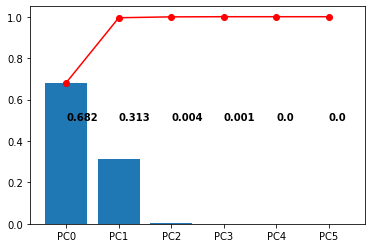

In [40]:
from sklearn.decomposition import PCA

components = 6

pca = PCA(n_components= components)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X))

expl_var_ratio = pca.explained_variance_ratio_
var_cumsum = expl_var_ratio.cumsum()

plt.bar(["PC" + str(x) for x in range(len(expl_var_ratio))], expl_var_ratio)
plt.plot(["PC" + str(x) for x in range(len(var_cumsum))], var_cumsum, "ro-")

for num, evr in enumerate(expl_var_ratio):
    plt.text(num, 0.5, str(np.round(evr, 3)), fontweight= "bold")

plt.show()

La composante "PC0" explique 68.2% des données tandis que "PC1" en explique 31.3%. À elles deux, elles expliquent plus de 99% des données.

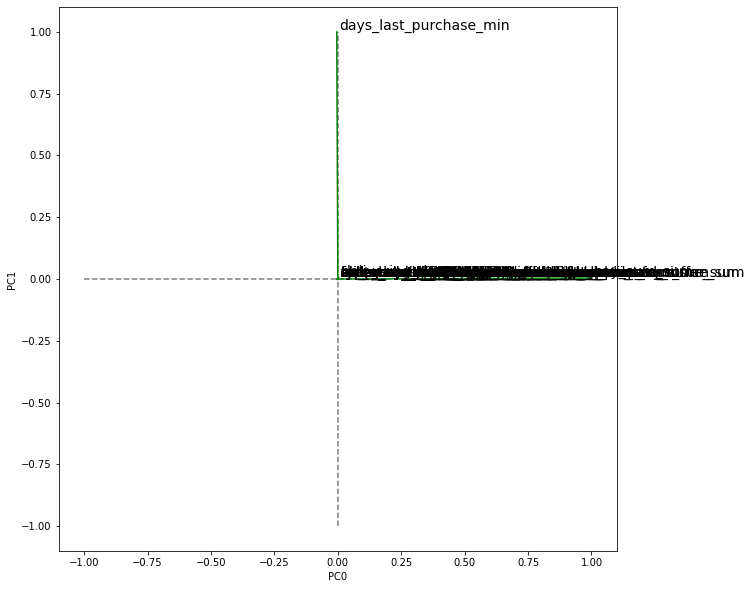

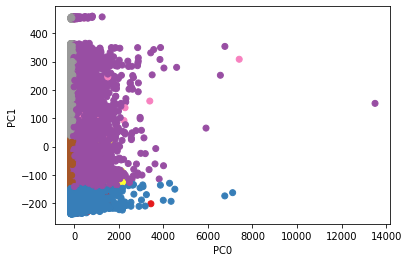

In [44]:
fig = plt.figure(figsize=(10, 10))
plt.plot([-1, 1], [0, 0], color= "grey", ls="--")
plt.plot([0, 0], [-1, 1], color= "grey", ls="--")

for i, (x, y) in enumerate(zip(pca.components_.T[:, 0], pca.components_.T[:, 1])):
    plt.plot([0, x], [0, y], color= "g", ls= "-")
    plt.text(x + 0.01, y + 0.01, X.columns[i], fontsize= 14)

plt.xlabel("PC0")
plt.ylabel("PC1")

plt.show()

plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c= labels["labels"], cmap= "Set1")

plt.xlabel("PC0")
plt.ylabel("PC1")

plt.show()


## Analyse finale

Je dois OneHotEncoder la feature "customer_state" pour pouvoir faire les groupby afin de mettre en évidence les différents segments.

In [45]:
from sklearn.preprocessing import OneHotEncoder

X = labels.customer_state.to_numpy().reshape(-1, 1)
ohe = OneHotEncoder().fit(X)

X_ohe = pd.DataFrame(ohe.transform(X).toarray(), columns= ohe.get_feature_names_out(["customer_state__"]), index= labels.index)

In [46]:
datas_f = labels.merge(X_ohe, left_index= True, right_index= True)
datas_f.drop("customer_state", axis= 1, inplace= True)

datas_f

,labels,customer_unique_id,nb_score_sum,pay_sum_sum,nb_product_sum_sum,type_boleto_sum,type_credit_card_sum,type_debit_card_sum,type_voucher_sum,category__agro_industry_and_commerce_sum,category__air_conditioning_sum,category__art_sum,category__arts_and_craftmanship_sum,category__audio_sum,category__auto_sum,category__baby_sum,category__bed_bath_table_sum,category__books_general_interest_sum,category__books_imported_sum,category__books_technical_sum,category__cds_dvds_musicals_sum,category__christmas_supplies_sum,category__cine_photo_sum,category__computers_sum,category__computers_accessories_sum,category__consoles_games_sum,category__construction_tools_construction_sum,category__construction_tools_lights_sum,category__construction_tools_safety_sum,category__cool_stuff_sum,category__costruction_tools_garden_sum,category__costruction_tools_tools_sum,category__diapers_and_hygiene_sum,category__drinks_sum,category__dvds_blu_ray_sum,category__electronics_sum,category__fashio_female_clothing_sum,category__fashion_bags_accessories_sum,category__fashion_childrens_clothes_sum,category__fashion_male_clothing_sum,category__fashion_shoes_sum,category__fashion_sport_sum,category__fashion_underwear_beach_sum,category__fixed_telephony_sum,category__flowers_sum,category__food_sum,category__food_drink_sum,category__furniture_bedroom_sum,category__furniture_decor_sum,category__furniture_living_room_sum,category__furniture_mattress_and_upholstery_sum,category__garden_tools_sum,category__health_beauty_sum,category__home_appliances_sum,category__home_appliances_2_sum,category__home_comfort_2_sum,category__home_confort_sum,category__home_construction_sum,category__housewares_sum,category__industry_commerce_and_business_sum,category__kitchen_dining_laundry_garden_furniture_sum,category__kitchen_laptops_and_food_preparers_sum,category__la_cuisine_sum,category__luggage_accessories_sum,category__market_place_sum,category__music_sum,category__musical_instruments_sum,category__office_furniture_sum,category__others_sum,category__party_supplies_sum,category__pc_gamer_sum,category__perfumery_sum,category__pet_shop_sum,category__security_and_services_sum,category__signaling_and_security_sum,category__small_appliances_sum,category__small_appliances_home_oven_and_coffee_sum,category__sports_leisure_sum,category__stationery_sum,category__tablets_printing_image_sum,category__telephony_sum,category__toys_sum,category__watches_gifts_sum,seller_state__AC_sum,seller_state__AM_sum,seller_state__BA_sum,seller_state__CE_sum,seller_state__DF_sum,seller_state__ES_sum,seller_state__GO_sum,seller_state__MA_sum,seller_state__MG_sum,seller_state__MS_sum,seller_state__MT_sum,seller_state__PA_sum,seller_state__PB_sum,seller_state__PE_sum,seller_state__PI_sum,seller_state__PR_sum,seller_state__RJ_sum,seller_state__RN_sum,seller_state__RO_sum,seller_state__RS_sum,seller_state__SC_sum,seller_state__SE_sum,seller_state__SP_sum,days_last_purchase_min,frequency,init_score_mean,delivering_time_mean,customer_state___AC,customer_state___AL,customer_state___AM,customer_state___AP,customer_state___BA,customer_state___CE,customer_state___DF,customer_state___ES,customer_state___GO,customer_state___MA,customer_state___MG,customer_state___MS,customer_state___MT,customer_state___PA,customer_state___PB,customer_state___PE,customer_state___PI,customer_state___PR,customer_state___RJ,customer_state___RN,customer_state___RO,customer_state___RR,customer_state___RS,customer_state___SC,customer_state___SE,customer_state___SP,customer_state___TO
0,2,7c396fd4830fd04220f754e42b4e5bff,2,82.82,2,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,331,2,4.5,4.

In [47]:
from POLIST_00_graph_analysis import segmentation

segments_names = ["Meilleurs clients", "Nouveaux clients", "Clients loyaux", 
    "Clients ayant dépensé le plus", "Bons clients presque perdus", 
    "Mauvais clients presque perdus", "Bons clients perdus", 
    "Mauvais clients perdus"]

conditions = [datas_f['labels'] == x for x in range(datas_f["labels"].max() +1)]# np.sort(datas_f["labels"].unique())]
    # [datas['rfm_score'] == '555', 
    # (datas['r_quintiles'] == 5) & (datas['f_quintiles'] == 1), 
    # datas['f_quintiles'] == 5, datas['m_quintiles'].isin([5, 4]), 
    # (datas['r_quintiles'].isin([4, 3])) & (datas['f_quintiles'] == 5) & 
    # (datas['m_quintiles'].isin([5, 4])), 
    # (datas['r_quintiles'].isin([4, 3])) & (datas['f_quintiles'] == 1) & 
    # (datas['m_quintiles'].isin([3, 2, 1])), 
    # (datas['r_quintiles'].isin([2, 1])) & (datas['f_quintiles'] == 5) & 
    # (datas['m_quintiles'].isin([5, 4])), 
    # (datas['r_quintiles'].isin([2, 1])) & (datas['f_quintiles'] == 1) & 
    # (datas['m_quintiles'].isin([3, 2, 1]))
    # ]

segments = segmentation(datas_f, conditions, segments_names)
segments

,segment_name,nb_clients,perc_clients,payment_mean_value,montant_CA,perc_CA,buyed_prod_mean,prod_price_mean,buyed_prod_nb,perc_buyed_prod_nb,perc_boleto_payment,perc_credit_card_payment,perc_debit_card_payment,perc_voucher_payment,best_cat_1,perc_best_cat_1,best_cat_2,perc_best_cat_2,best_cat_3,perc_best_cat_3,worst_cat_1,perc_worst_cat_1,worst_cat_2,perc_worst_cat_2,worst_cat_3,perc_worst_cat_3,mean_last_purchase_day,mean_frequency,mean_scores,best_cust_state,relat_perc_best_cust_state,abs_perc_best_cust_state,worst_cust_state,relat_perc_worst_cust_state,abs_perc_worst_cust_state
0,Meilleurs clients,504,0.5,365.22,184071.19,1.2,2.75,132.81,1388,1.3,15.5,75.1,2.6,6.8,bed bath table,12.0,sports leisure,8.7,health beauty,8.6,agro industry and commerce,0.0,home comfort 2,0.0,flowers,0.0,46.8,2.2,4.4,SP,43.3,0.2,TO,0.0,0.0
1,Nouveaux clients,18083,19.5,163.07,2948776.96,19.3,1.12,145.60,20286,18.7,17.8,74.4,3.5,4.3,health beauty,12.0,bed bath table,9.5,housewares,7.7,la cuisine,0.0,security and services,0.0,cds dvds musicals,0.0,45.3,1.0,4.3,SP,46.3,9.0,RR,0.0,0.0
2,Clients loyaux,559,0.6,98.01,54788.13,0.4,2.14,45.80,1198,1.1,19.3,68.8,1.9,10.0,bed bath table,10.7,health beauty,9.7,sports leisure,8.1,party supplies,0.0,fashion male clothing,0.0,fashion childrens clothes,0.0,239.3,2.0,4.3,SP,53.8,0.3,AC,0.0,0.0
3,Clients ayant dépensé le plus,27733,29.9,298.37,8274636.52,54.2,1.24,240.62,34509,31.7,16.8,78.1,0.7,4.4,bed bath table,9.3,watches gifts,8.2,sports leisure,7.7,arts and craftmanship,0.0,fashion childrens clothes,0.0,cds dvds musicals,0.0,283.8,1.0,4.0,SP,35.7,10.7,RR,0.0,0.0
4,Bons clients presque perdus,966,1.0,357.39,345235.52,2.3,2.63,135.89,2538,2.3,18.3,75.2,0.7,5.8,bed bath table,14.8,computers accessories,9.6,sports leisure,9.5,agro industry and commerce,0.0,costruction tools tools,0.0,kitchen laptops and food preparers,0.0,177.1,2.1,4.1,SP,42.7,0.4,AM,0.0,0.0
5,Mauvais clients presque perdus,21957,23.7,72.45,1590725.10,10.4,1.06,68.35,23237,21.4,20.5,72.6,1.3,5.6,bed bath table,9.6,health beauty,9.0,sports leisure,7.6,security and services,0.0,kitchen laptops and food preparers,0.0,pc gamer,0.0,178.4,1.0,4.1,SP,46.2,10.9,RR,0.0,0.0
6,Bons clients perdus,739,0.8,351.82,259991.78,1.7,2.54,138.51,1878,1.7,17.9,72.2,0.5,9.4,bed bath table,19.5,furniture decor,14.0,sports leisure,10.7,diapers and hygiene,0.0,fashion childrens clothes,0.0,flowers,0.0,379.8,2.1,4.2,SP,37.2,0.3,RR,0.0,0.0
7,Mauvais clients perdus,22290,24.0,72.60,1618227.24,10.6,1.06,68.49,23685,21.8,21.9,70.1,1.1,7.0,bed bath table,10.0,sports leisure,8.3,health beauty,7.9,kitchen laptops and food preparers,0.0,diapers and hygiene,0.0,pc gamer,0.0,395.9,1.0,4.2,SP,41.8,10.0,AP,0.0,0.0


### Détails

1. Les ***meilleurs clients*** représentent 0.5% des clients. En moyenne, ils achètent 2.75 articles au prix moyen de 132.81, soit un panier moyen de 365.22. Ils participent à hauteur de 1.2% du CA total et payent majoritairement par carte de crédit (75.1%) et par boleto (15.5%). Leurs catégories préférées sont "bed bath table" (12.0%), "sports leisure" (8.7%) et "health beauty" (8.6%). Ces clients ont passé en moyenne 2.2 commandes dont la dernière a eu lieu il y a en moyenne 46.8 jours à la date de l'analyse. Ces clients proviennent à 43.3% de l'état "SP". Ils ont donné un score moyen de 4.4 étoiles.
2. Les ***nouveaux clients*** représentent 19.5% des clients. En moyenne, ils achètent 1.12 articles au prix moyen de 145.60, soit un panier moyen de 163.07. Ils participent à hauteur de 19.3% du CA total et payent majoritairement par carte de crédit (74.4%) et par boleto (17.8%). Leurs catégories préférées sont "health beauty" (12.0%), "bed bath table" (9.5%) et "housewares" (7.7%). Ces clients ont passé en moyenne 1.0 commandes dont la dernière a eu lieu il y a en moyenne 45.3 jours à la date de l'analyse. Ces clients proviennent à 46.3% de l'état "SP". Ils ont donné un score moyen de 4.3 étoiles.
3. Les ***clients loyaux*** représentent 0.6% des clients. En moyenne, ils achètent 2.14 articles au prix moyen de 45.80, soit un panier moyen de 98.01. Ils participent à hauteur de 0.4% du CA total et payent majoritairement par carte de crédit (68.8%) et par boleto (19.3%). Leurs catégories préférées sont "bed bath table" (10.7%), "health beauty" (9.7%) et "sports leisure" (8.1%). Ces clients ont passé en moyenne 2.0 commandes dont la dernière a eu lieu il y a en moyenne 239.3 jours à la date de l'analyse. Ces clients proviennent à 53.8% de l'état "SP". Ils ont donné un score moyen de 4.3 étoiles.
4. Les ***clients ayant dépensés le plus*** représentent 29.9% des clients. En moyenne, ils achètent 1.24 articles au prix moyen de 240.62, soit un panier moyen de 298.37. Ils participent à hauteur de 54.2% du CA total et payent majoritairement par carte de crédit (78.1%) et par boleto (16.8%). Leurs catégories préférées sont "bed bath table" (9.3%), "watches gifts" (8.2%) et "sports leisure" (7.7%). Ces clients ont passé en moyenne 1.0 commandes dont la dernière a eu lieu il y a en moyenne 283.8 jours à la date de l'analyse. Ces clients proviennent à 35.7% de l'état "SP". Ils ont donné un score moyen de 4.0 étoiles.
5. Les ***bons clients presque perdus*** représentent 1.0% des clients. En moyenne, ils achètent 2.63 articles au prix moyen de 135.89, soit un panier moyen de 357.39. Ils participent à hauteur de 2.3% du CA total et payent majoritairement par carte de crédit (75.2%) et par boleto (18.3%). Leurs catégories préférées sont "bed bath table" (14.8%), "computers accessories" (9.6%) et "sports leisure" (9.5%). Ces clients ont passé en moyenne 2.1 commandes dont la dernière a eu lieu il y a en moyenne 177.1 jours à la date de l'analyse. Ces clients proviennent à 42.7% de l'état "SP". Ils ont donné un score moyen de 4.1 étoiles.
6. Les ***mauvais clients presque perdus*** représentent 23.7% des clients. En moyenne, ils achètent 1.06 articles au prix moyen de 68.35, soit un panier moyen de 72.45. Ils participent à hauteur de 10.4% du CA total et payent majoritairement par carte de crédit (72.6%) et par boleto (20.5%). Leurs catégories préférées sont "bed bath table" (9.6%), "health beauty" (9.0%) et "sports leisure" (7.6%). Ces clients ont passé en moyenne 1.0 commandes dont la dernière a eu lieu il y a en moyenne 178.4 jours à la date de l'analyse. Ces clients proviennent à 46.2% de l'état "SP". Ils ont donné un score moyen de 4.1 étoiles.
7. Les ***bons clients perdus*** représentent 0.8% des clients. En moyenne, ils achètent 2.54 articles au prix moyen de 138.51, soit un panier moyen de 351.82. Ils participent à hauteur de 1.7% du CA total et payent majoritairement par carte de crédit (72.2%) et par boleto (17.9%). Leurs catégories préférées sont "bed bath table" (19.5%), "furniture decor" (14.0%) et "sports leisure" (10.7%). Ces clients ont passé en moyenne 2.1 commandes dont la dernière a eu lieu il y a en moyenne 379.8 jours à la date de l'analyse. Ces clients proviennent à 37.2% de l'état "SP". Ils ont donné un score moyen de 4.2 étoiles.
8. Les ***mauvais clients perdus*** représentent 24.0% des clients. En moyenne, ils achètent 1.06 articles au prix moyen de 68.49, soit un panier moyen de 72.60. Ils participent à hauteur de 10.6% du CA total et payent majoritairement par carte de crédit (70.1%) et par boleto (21.9%). Leurs catégories préférées sont "bed bath table" (10.0%), "sports leisure" (8.3%) et "health beauty" (7.9%). Ces clients ont passé en moyenne 1.0 commandes dont la dernière a eu lieu il y a en moyenne 395.9 jours à la date de l'analyse. Ces clients proviennent à 41.8% de l'état "SP". Ils ont donné un score moyen de 4.2 étoiles.